# load data

In [1]:
from my_imports import *
from collections import Counter
import copy
import os
import natureTools as nt

# to use  my own stylimport matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib as mpl


#load in the ec model

#importlib.reload(evcouplings)
import evcouplings
from evcouplings.couplings import CouplingsModel
from evcouplings.mutate import predict_mutation_table, single_mutant_matrix

%matplotlib inline
from my_imports import *
import stanTools
import matplotlib.style as style
import plotMutationMatrix as pmm
import natureTools as nt
from mutTools import fasta_iter_py3, hamming
from constants import AA_LIST_ALPHABETICAL
aa_20 = AA_LIST_ALPHABETICAL[:20]

from scipy.stats import pearsonr, spearmanr


mpl.rcParams.update(mpl.rcParamsDefault)

avb_cols = {'pur':'#5B49B6', 
            'blu':'#52A4D9', 
            'tur':'#59C09D',
            'tea':'#B3EBAD',
            'yel': '#C3D64C',
            'gra':'#9B9B9D'}
avb_contrast_cols = {
    'p': '#C17EFF',
    'g': '#75C26A'
}
plt.style.use('/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/src/paper_style1.mplstyle')



/Users/davidding/anaconda3/envs/tf_env/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)
/Users/davidding/anaconda3/envs/tf_env/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/davidding/anaconda3/envs/tf_env/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
# load all the data in
%run -i 2012_load_data.py

# of nontoxic mutants in all concentrations 839
# of toxin mutants that are toxic in all conditions: 311
# of nontoxic mutants in all concentrations 855
# of toxin mutants that are toxic in all conditions: 781
len of mt_toxins: 310
len of ta_toxins 781
15
15
30
37


2012_load_data.py:634: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_muts_mt_wt_toxin['t_pos_pdb'] = df_muts_mt_wt_toxin.t_mut.str[1:-1].astype(int) +1
2012_load_data.py:735: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curr['at_mut'] = [at] * len(df_curr)


In [3]:
# load ecs in
%run -i 2103_read_ec_files.py

added so many missing rows to df_longrange 736
added so many missing rows to df_longrange 729
added so many missing rows to df_longrange 744
added so many missing rows to df_longrange 752
added so many missing rows to df_longrange 752
added so many missing rows to df_longrange 744
added so many missing rows to df_longrange 806
added so many missing rows to df_longrange 744
added so many missing rows to df_longrange 751
added so many missing rows to df_longrange 810
1389.0


/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/src/natureTools.py:1466: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['tp_inter'] = tp_inter
/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/src/natureTools.py:1467: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['tp_mono1'] = tp_mono1
/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/src/natureTools.py:1468: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

1390.0
1197.0
1189.0
1140.0
1047.0
915.0
1410.0
1198.0
1410.0
1198.0
added so many missing rows to df_longrange 806
915.0


In [5]:

indir = '/Users/davidding/Dropbox (HMS)/parESingleLibrary/ex54_coevolution/'
# reading my scans in
complex_score_dir = indir + 'scan/'
c = CouplingsModel(complex_score_dir+'F7YBW7ur_b03_F7YBW8ur_b03_theta08_m80_f80.model')

In [20]:
plot_out= '/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/pairedEnd/x51/2103_out/'


In [6]:
df_single_mutant_matrix = single_mutant_matrix(c)
df_single_mutant_matrix['pos_m0'] = df_single_mutant_matrix.pos -1
df_single_mutant_matrix['mutant_m0'] = df_single_mutant_matrix.wt + df_single_mutant_matrix.pos_m0.astype(str) + df_single_mutant_matrix.subs

In [7]:
# get raw ali for b03
df_seqs = nt.load_df_ali(ali_fin = complex_score_dir + 'F7YBW7ur_b03_F7YBW8ur_b03_theta08_m80_f80.a2m')


In [8]:
df_muts_singles_mt['aa_mut_ev'] = df_muts_singles_mt.t_mut.apply(lambda t_mut: str(t_mut[0])+str(int(t_mut[1:-1])+1) + t_mut[-1])


2103_read_ec_files.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import natureTools as nt


In [9]:
df_ec = bs_to_df['03']
df_inters = df_ec.loc[df_ec.segment_i != df_ec.segment_j]

In [10]:
# unpack the muts
importlib.reload(nt)
df_obs = nt.get_ind_mut_cols(df_merge_mt)

# merge on all the observed growth rates
df_merge_ec = df_obs.merge(df_inters,how='left', left_on = ['at_aa_pos_m1', 't_aa_pos_m1'], right_on = ['j','i'])
print(df_obs.shape, df_inter.shape, df_merge_ec.shape)

(11016, 31) (7120, 11) (11016, 47)


In [11]:
df_merge_ec['epi'] = df_merge_ec.yobs - df_merge_ec.yhat
df_merge_ec['mutkeys'] = df_merge_ec.at_mut+':'+df_merge_ec.t_mut
df_resc_low_mt['mutkeys'] = df_resc_low_mt.at_mut+':'+df_resc_low_mt.t_mut
df_resc_ec = df_merge_ec.loc[df_merge_ec.mutkeys.isin(df_resc_low_mt.mutkeys)]

#merge in the specific or not pair
df_merge_mt_l_resc = df_resc_ec.merge(df_merge_all_mt_l_1[['at_mut', 't_mut','sig_epi']], left_on=['at_mut','t_mut'], right_on =['at_mut', 't_mut'])

In [12]:
df_merge_ec_del_at = df_merge_ec.loc[df_merge_ec.at_mut.isin(del_at_low05)]

In [13]:
# get max epistastic pairs for each antitoxin
max_epi_idx = df_merge_ec_del_at.groupby('at_mut').idxmax()['epi']
df_max_epi_rows_del_at =df_merge_ec_del_at.loc[max_epi_idx.values]

In [14]:
df_merge_obs_smm = df_single_mutant_matrix.merge(df_muts_singles, left_on='mutant_m0', right_on='t_mut')
df_merge_obs_smm_mt = df_merge_obs_smm.loc[df_merge_obs_smm.mutant_m0.isin(mt_toxins)]


In [15]:
# adding the frequency counts in alignment
df_seqs= df_seqs.rename(dict(zip(df_seqs.index, ['template']+ list(df_seqs.index)[1:])))

df_merge_obs_smm_mt['count'] = df_merge_obs_smm_mt.apply(
    lambda r: int(nt.get_aas_at_pos(df_seqs, 't', r.pos_m0,r.wt)[r.subs]),axis=1)

2103_read_ec_files.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
# adding pairwise counts
#using the couplings model
df_merge_mt['fij_pair'] = df_merge_mt.apply(
    lambda r: nt.get_fij_of_mut(c, r.t_aa_pos_m1, r.t_wt_aa, r.t_mut_aa, r.at_aa_pos_m1, r.at_wt_aa, r.at_mut_aa)
                                                          ,axis=1)

df_merge_mt['jij_pair'] = df_merge_mt.apply(
    lambda r: nt.get_jij_of_mut(c, r.t_aa_pos_m1, r.t_wt_aa, r.t_mut_aa, r.at_aa_pos_m1, r.at_wt_aa, r.at_mut_aa)
                                                          ,axis=1)
df_merge_mt_del_at = df_merge_mt.loc[df_merge_mt.at_mut.isin(del_at_low05)]
df_merge_mt_del_at.index = range(len(df_merge_mt_del_at))

df_merge_mt_l_resc.columns
   
df_merge_mt_l_resc['fij_pair'] = df_merge_mt_l_resc.apply(
    lambda r: nt.get_fij_of_mut(c, r.t_aa_pos_m1, r.t_wt_aa, r.t_mut_aa, 
                             r.at_aa_pos_m1, r.at_wt_aa, r.at_mut_aa)
                                                          ,axis=1)

df_merge_mt_l_resc['jij_pair'] = df_merge_mt_l_resc.apply(
    lambda r: nt.get_jij_of_mut(c, r.t_aa_pos_m1, r.t_wt_aa, r.t_mut_aa, 
                             r.at_aa_pos_m1, r.at_wt_aa, r.at_mut_aa), axis=1)

aas = 'ACDEFGHIKLMNPQRSTVWY'                                              
# generate some random fij mutations for these pairs of mutations, keeping positions the same but varying the toxin mutation
# could also control for toxic toxin mutants
fij_bg = []
jij_bg = []
for n,r in df_merge_mt_l_resc.iterrows():
    
    for t_mut_aa in aas:
        fij = nt.get_fij_of_mut(c, r.t_aa_pos_m1, r.t_wt_aa, t_mut_aa, r.at_aa_pos_m1, r.at_wt_aa, r.at_mut_aa)
        fij_bg.append(fij)
        
        jij = nt.get_jij_of_mut(c, r.t_aa_pos_m1, r.t_wt_aa, t_mut_aa, r.at_aa_pos_m1, r.at_wt_aa, r.at_mut_aa)
        jij_bg.append(jij)


In [17]:

index_names = df_merge_mt_l_resc.loc[df_merge_mt_l_resc.fij_pair != -1].index
df_merge_mt_l_resc_no_nan = df_merge_mt_l_resc.iloc[index_names]

sum(df_merge_mt_l_resc_no_nan.fij_pair == 0)

# get pair_count
df_merge_mt_l_resc_no_nan['pair_count']= df_merge_mt_l_resc_no_nan.apply(
    lambda r: int(nt.get_aas_at_pos_cond(df_seqs, r.t_aa_pos, r.t_wt_aa,r.at_aa_pos, r.at_wt_aa, r.at_mut_aa)[r.t_mut_aa]), axis=1)


2103_read_ec_files.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  #######################################################


In [18]:

# frequency. of T* given AT* among all possible aas at that position
df_merge_mt_l_resc_no_nan['freq_t_given_at_cond']= df_merge_mt_l_resc_no_nan.apply(
    lambda r: float((nt.get_aas_at_pos_cond(df_seqs, r.t_aa_pos, r.t_wt_aa,
                                        r.at_aa_pos, r.at_wt_aa, r.at_mut_aa)[r.t_mut_aa]))/
    len(df_seqs),
    axis=1)


# normalized to T* frequency
df_merge_mt_l_resc_no_nan['T_count'] = df_merge_mt_l_resc_no_nan.apply(
    lambda r: int(nt.get_aas_at_pos(df_seqs, 't', r.t_aa_pos,r.t_wt_aa)[r.t_mut_aa]),axis=1)
df_merge_mt_l_resc_no_nan['T_freq'] = df_merge_mt_l_resc_no_nan.T_count.astype(float)/ len(df_seqs)

df_merge_mt_l_resc_no_nan['freq_t_given_at_cond_norm_t_freq'] = df_merge_mt_l_resc_no_nan.apply(
    lambda r: r.freq_t_given_at_cond/r.T_freq if r.T_freq != 0 else np.nan,
    axis=1
)

2103_read_ec_files.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ########### load in ecs
2103_read_ec_files.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ec_03 = pd.read_csv(ec_din+ 'ecouplings_b03_complex.csv')
2103_read_ec_files.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

"\n#division by zero issue\ndf_merge_mt_l_resc_no_nan['freq_t_given_at_cond']= df_merge_mt_l_resc_no_nan.apply(\n    lambda r: (float((nt.get_aas_at_pos_cond(df_seqs, r.t_aa_pos, r.t_wt_aa,\n                                    r.at_aa_pos, r.at_wt_aa, r.at_mut_aa)[r.t_mut_aa]))/\n              len(df_seqs))/\n    r.T_freq,\n    axis=1)\n"

# fig5C covariation scores

/Users/davidding/anaconda3/envs/tf_env/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/davidding/anaconda3/envs/tf_env/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


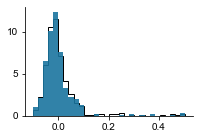

In [31]:
# for cn score
fig =plt.figure(figsize=(3,2))
bins=30
n, bins, patches = plt.hist(df_merge_ec.cn, 
                            density=True, alpha=1, bins=bins, 
                            color='black', 
                            histtype='step',
                            log=False)

df_resc_toxins = df_merge_ec.loc[df_merge_ec.t_mut.isin(df_resc_ec.t_mut)]
plt.hist(df_resc_toxins.cn, density=True, alpha=0.9, bins=bins, 
         color='#1a759f',
         histtype='stepfilled')
#plt.title('covariation scores of rescuing toxins')


fig.patch.set_visible('False')
plt.savefig(plot_out + 'covar_ben_vs_all_cn.svg', format='svg')
plt.savefig(plot_out + 'covar_ben_vs_all_cn.pdf', format='pdf')

plt.show()

# fig 5D correlation sitewise

(-0.10047768840123394, 0.16665983130127118)
SpearmanrResult(correlation=-0.04410966850223283, pvalue=0.5445804227194917)


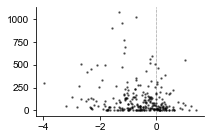

In [28]:
# correlation between beneficial independent effect and frequency?
# for most toxic mutants
fig = plt.figure(figsize=(3,2))

df_pos = df_merge_obs_smm_mt.loc[df_merge_obs_smm_mt.linear_latent_from_wt >0]
df_neg = df_merge_obs_smm_mt.loc[df_merge_obs_smm_mt.linear_latent_from_wt <=0]

x=df_pos.linear_latent_from_wt
y= df_pos['count']
plt.scatter(x,y, s=2, c='black', alpha=0.5)


x=df_neg.linear_latent_from_wt
y= df_neg['count']
plt.scatter(x,y, s=2, c='black', alpha=0.5)


plt.axvline(0, c='black', linewidth=0.5, linestyle='dotted')
print(pearsonr(x,y))
print(spearmanr(x,y))
#plt.xlabel('independent efx')
#plt.ylabel('# of times observed in alignment')
#plt.title('most toxic inferred toxin singles')

fig.patch.set_visible('False')

plt.savefig(plot_out + 'indep_sitewise.svg', format='svg')
plt.savefig(plot_out + 'indep_sitewise.pdf', format='pdf')

plt.show()

# suppl independent

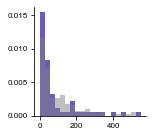

In [34]:
plt.figure(figsize=(2,2))
n, bins, patches= plt.hist(df_merge_obs_smm_mt.loc[df_merge_obs_smm_mt.linear_latent_from_wt > 0]['count'],
        density=True,
        label='independent beneficial toxins', 
         alpha=0.9,
        bins=20, color=avb_cols['pur'])
plt.hist(df_merge_obs_smm_mt['count'], density=True, label='all toxic T*', alpha=0.5, bins=bins, color='grey')

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 8)

#plt.xlabel('number of times mutation observed in alignment')
#plt.ylabel('density')

#plt.legend()
plt.savefig(plot_out + 'indep_mut_beneficial_count.svg', format='svg')

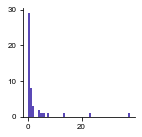

In [25]:
plt.figure(figsize=(2,2))
plt.hist(df_merge_mt_l_resc_no_nan.pair_count, bins=50, color=avb_cols['pur'])
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 8)
#plt.xlabel('number of times pair observed')
#plt.ylabel('number of beneficial pairs')
plt.savefig(plot_out + 'pair_counts_obs.svg', format='svg')
#plt.show()

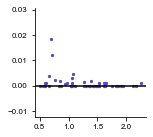

In [27]:
plt.figure(figsize=(2,2))
plt.scatter(df_merge_mt_l_resc_no_nan.mean_fit, df_merge_mt_l_resc_no_nan.fij_pair, s=5)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 8)
plt.axhline(0, color='black')
#plt.xlabel('toxin rescues')
#plt.ylabel('fraction of mutation pair in alignment')
plt.savefig(plot_out + 'pair_rescue_vs_frequency_ali.svg', format='svg')

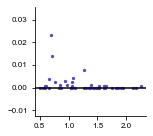

In [28]:
plt.figure(figsize=(2,2))
plt.scatter(df_merge_mt_l_resc_no_nan.mean_fit, df_merge_mt_l_resc_no_nan.freq_t_given_at_cond, s=5)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 8)
plt.axhline(0, color='black')
#plt.xlabel('rescue')
#plt.ylabel('conditional frequency T* | AT*=ATmut')
#plt.title('conditional frequency. T*|AT*=ATmut')
plt.savefig(plot_out + 'cond_freq_beneficial.svg', format='svg')
plt.show()

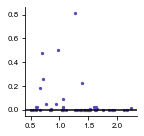

In [29]:
plt.figure(figsize=(2,2))
plt.scatter(df_merge_mt_l_resc_no_nan.mean_fit, 
            df_merge_mt_l_resc_no_nan.freq_t_given_at_cond_norm_t_freq, 
           s=5)
plt.axhline(0, color='black')
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 8)
#plt.xlabel('rescue')
#plt.ylabel('enrichment freq(T* | AT*=ATmut) / freq(T*)')
#plt.title('enrichment in conditional frequency over background freq(T*|AT*=ATmut)/freq(T*))')
plt.savefig(plot_out + 'enrich_cond_freq_beneficial.svg', format='svg')

plt.show()

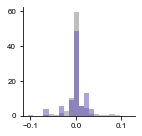

In [35]:
# plot jij distirbutions
plt.figure(figsize=(2,2))
bins=20


n, bins, patches = plt.hist([v for v in jij_bg if v != -1], 
                            density=True, bins=bins, alpha=0.5, 
                            #log=True, 
                            label='null pairwise frequencies', color='grey')

plt.hist([v for v in df_merge_mt_l_resc.jij_pair if v != -1], 
         bins=bins, density=True, alpha=0.5, 
         #log=True, 
         label='rescuing pairwise frequencies', color=avb_cols['pur'])

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 8)

#plt.xlabel('inferred pairwise preference from evCouplings')
#plt.title('does evCouplings infer pairwise preferences of rescuing mutation pairs?')
#plt.legend()
plt.savefig(plot_out + 'jij_beneficial.svg', format='svg')

plt.show()


(0.2602431195698318, 2.392607977130657e-05)
SpearmanrResult(correlation=0.24861155099086052, pvalue=5.588032991417044e-05)


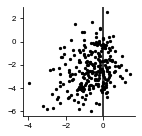

In [36]:
# adding ev couplings predictions
df_all_preds = pd.DataFrame()
for col in ['linear_latent_from_wt']:
    suffix = col.split('_')[0]
    df_tmp = df_muts_singles_mt[['aa_mut_ev', col]]
    df_tmp = df_tmp.rename(columns = {'aa_mut_ev':'mutant'})
    df_pred  = predict_mutation_table(c, df_tmp, 'effect_prediction_epi_only_'+suffix, hamiltonian = 'couplings') # need to change this.
    if df_all_preds.empty:
        df_all_preds = df_pred
    else:
        df_all_preds = df_all_preds.merge(df_pred, on='mutant')
        

plt.figure(figsize=(2,2))
plt.scatter(df_all_preds.linear_latent_from_wt, 
            df_all_preds.effect_prediction_epi_only_linear,
           c='black', 
           s=5)

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 8)

plt.axvline(0, color='black')
df_all_preds_no_nan = df_all_preds.dropna()
print(pearsonr(df_all_preds_no_nan.linear_latent_from_wt, df_all_preds_no_nan.effect_prediction_epi_only_linear))
print(spearmanr(df_all_preds_no_nan.linear_latent_from_wt, df_all_preds_no_nan.effect_prediction_epi_only_linear))

#plt.xlabel('linear effect in nonlinear model')
#plt.ylabel('sitewise ev couplings prediction of single mutant')
plt.savefig(plot_out + 'nonlienar_effects_vs_evcouplings_epi_only.svg', format='svg')
plt.show()

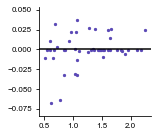

In [37]:
plt.figure(figsize=(2,2))
plt.scatter(df_merge_mt_l_resc_no_nan.mean_fit, df_merge_mt_l_resc_no_nan.jij_pair, s=5)
plt.axhline(0, color='black')

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 8)

#plt.xlabel('toxin rescues')
#plt.ylabel('jij ')
plt.savefig(plot_out + 'delta_gr_vs_jij.svg', format='svg')

plt.show()